In [220]:
##Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [221]:
## Loading the Dataset
from google.colab import files
files.upload()

Saving titanic_dataset.csv to titanic_dataset (3).csv


{'titanic_dataset.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55

In [222]:
data = pd.read_csv('titanic_dataset.csv')

In [223]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [224]:
data.shape

(891, 12)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [226]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [227]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [228]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [229]:
## Filtering Out the features with Null Values
features_with_na = [features for features in data.columns
                                 if data[features].isna().sum()>1]

In [230]:
##Looking for % of missing values 
for feature in features_with_na:
    print(feature, np.round(data[feature].isna().mean(),2),'% missing values')

Age 0.2 % missing values
Cabin 0.77 % missing values
Embarked 0.0 % missing values


'Survived' is the target Variable.
Dropping those columns which are not useful in predictive analysis because these variables are qualitative

In [231]:
data1 = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [232]:
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [233]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [234]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [235]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [236]:
## Filling Missing Values in 'Age' with median
data1["Age"] = data1["Age"].fillna(data1["Age"].median())

In [237]:
## Filling missing values in 'Embarked' with mode
data1["Embarked"] = data1["Embarked"].fillna(data1['Embarked'].mode()[0])

In [238]:
data1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Replacing the categorical value Embarked and Sex into numerical value

In [239]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df1 = data1.apply(LabelEncoder().fit_transform)

In [240]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,2,1,28,1,0,18,2
1,1,1,0,0,51,1,0,207,0
2,2,1,2,0,34,0,0,41,2
3,3,1,0,0,47,1,0,189,2
4,4,0,2,1,47,0,0,43,2


Splitting the data into train and test data.

In [241]:
X = df1.drop(['PassengerId', 'Survived'], axis=1)
y = df1['Survived']

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

kNN Model

In [244]:
#Using KNeighborsClassifier Method of neighbors class 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model = knn.fit(X_train, y_train)
  knn_y_pred = knn_model.predict(X_test)
  acc = accuracy_score(y_test, knn_y_pred)
  metric_k.append(acc)

In [245]:
metric_k

[0.6703910614525139,
 0.6480446927374302,
 0.6424581005586593,
 0.6703910614525139,
 0.6703910614525139,
 0.6759776536312849,
 0.664804469273743,
 0.664804469273743,
 0.6703910614525139,
 0.6815642458100558,
 0.7039106145251397,
 0.6927374301675978]

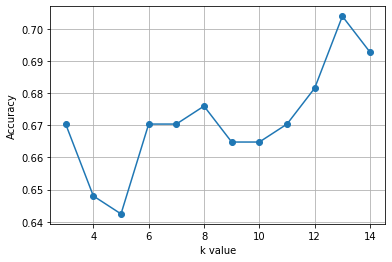

In [246]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

From above optimum k value is k = 13

In [247]:
knn = KNeighborsClassifier(n_neighbors=13)
knn_model2 = knn.fit(X_train, y_train)
y_pred_knn = knn_model2.predict(X_test)

In [248]:
print(confusion_matrix(y_test, y_pred_knn))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_knn))
print('Precision Score: ', precision_score(y_test, y_pred_knn, average=None))
print('Recall Score: ', recall_score(y_test, y_pred_knn, average=None))

[[92 13]
 [40 34]]
Accuracy Score:  0.7039106145251397
Precision Score:  [0.6969697  0.72340426]
Recall Score:  [0.87619048 0.45945946]


SVM Models

In [249]:
from sklearn.svm import SVC

In [250]:
## SVM Linear
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

In [251]:
print(confusion_matrix(y_test, svm_y_pred))
print('Accuracy Score: ', accuracy_score(y_test, svm_y_pred))

[[88 17]
 [22 52]]
Accuracy Score:  0.7821229050279329


In [252]:
## SVM RBF
svm_clf_rbf = SVC(kernel='rbf')
svm_model2 = svm_clf_rbf.fit(X_train, y_train)
y_pred_rbf = svm_model2.predict(X_test)

In [253]:
print(confusion_matrix(y_test, y_pred_rbf))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_rbf))

[[99  6]
 [55 19]]
Accuracy Score:  0.659217877094972


In [254]:
## SVM Poly
svm_clf_pol = SVC(kernel='poly')
svm_model3 = svm_clf_pol.fit(X_train, y_train)
y_pred_pol = svm_model3.predict(X_test)

In [255]:
print(confusion_matrix(y_test, y_pred_pol))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_pol))

[[99  6]
 [55 19]]
Accuracy Score:  0.659217877094972


K-Fold Cross Valiadation

In [256]:
from sklearn.model_selection import KFold

In [257]:
kfold_validator = KFold(10)

In [258]:
for train_index, test_index in kfold_validator.split(X, y):
    print('Training Index: ', train_index)
    print('Testing Index: ', test_index)

Training Index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

Checking Cross valiadation score of different models

In [259]:
from sklearn.model_selection import cross_val_score

In [260]:
##kNN model
cv_result_knn = cross_val_score(knn_model2, X,y, cv= kfold_validator)

In [261]:
cv_result_knn

array([0.54444444, 0.65168539, 0.62921348, 0.71910112, 0.61797753,
       0.76404494, 0.65168539, 0.75280899, 0.73033708, 0.74157303])

In [262]:
np.mean(cv_result_knn)

0.6802871410736578

In [263]:
## SVM linear Model
cv_result_svm1 = cross_val_score(svm_model, X,y, cv= kfold_validator)

In [264]:
cv_result_svm1

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [265]:
np.mean(cv_result_svm1)

0.786729088639201

In [266]:
## SVM RBF Model
cv_result_svm2 = cross_val_score(svm_model2, X,y, cv= kfold_validator)

In [267]:
cv_result_svm2

array([0.54444444, 0.64044944, 0.6741573 , 0.6741573 , 0.65168539,
       0.70786517, 0.65168539, 0.73033708, 0.73033708, 0.68539326])

In [268]:
np.mean(cv_result_svm2)

0.6690511860174781

In [269]:
##SVM Poly Model
cv_result_svm3 = cross_val_score(svm_model3, X,y, cv= kfold_validator)

In [270]:
cv_result_svm3

array([0.6       , 0.69662921, 0.68539326, 0.68539326, 0.65168539,
       0.69662921, 0.66292135, 0.74157303, 0.74157303, 0.70786517])

In [271]:
np.mean(cv_result_svm3)

0.6869662921348316

Stratified K-Fold Cross Validation

In [272]:
from sklearn.model_selection import StratifiedKFold

In [273]:
skfold_validator = StratifiedKFold(n_splits=10)

In [274]:
for train_index, test_index in skfold_validator.split(X, y):
    print('Training Index: ', train_index)
    print('Testing Index: ', test_index)

Training Index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

Checking Cross valiadation score of different models

In [275]:
## kNN Model
skcv_result_knn = cross_val_score(knn_model2, X,y, cv= skfold_validator)

In [276]:
skcv_result_knn

array([0.54444444, 0.60674157, 0.61797753, 0.76404494, 0.61797753,
       0.76404494, 0.6741573 , 0.75280899, 0.70786517, 0.71910112])

In [277]:
np.mean(skcv_result_knn)

0.676916354556804

In [278]:
## SVM Model
skcv_result_svm1 = cross_val_score(svm_model, X,y, cv= skfold_validator)

In [279]:
skcv_result_svm1

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [280]:
np.mean(skcv_result_svm1)

0.786729088639201

In [281]:
skcv_result_svm2 = cross_val_score(svm_model2, X,y, cv= skfold_validator)

In [282]:
skcv_result_svm2

array([0.55555556, 0.56179775, 0.68539326, 0.74157303, 0.6741573 ,
       0.69662921, 0.69662921, 0.71910112, 0.71910112, 0.66292135])

In [283]:
np.mean(skcv_result_svm2)

0.6712858926342072

In [284]:
skcv_result_svm3 = cross_val_score(svm_model3, X,y, cv= skfold_validator)

In [285]:
skcv_result_svm3 

array([0.63333333, 0.60674157, 0.70786517, 0.75280899, 0.68539326,
       0.69662921, 0.69662921, 0.70786517, 0.71910112, 0.68539326])

In [286]:
np.mean(skcv_result_svm3)

0.6891760299625469

In [287]:
print ("The Accuracy Score for Classification Models \n")
print ("K-Neighbors Classifier:")
print('Accuracy Score: ', accuracy_score(y_test, y_pred_knn),'\n')

print ("SVM Linear:")
print('Accuracy Score: ', accuracy_score(y_test, svm_y_pred),'\n')

print ("SVM RBF:")
print('Accuracy Score: ', accuracy_score(y_test, y_pred_rbf),'\n')

print ("SVM Poly:")
print('Accuracy Score: ', accuracy_score(y_test, y_pred_pol),'\n')

The Accuracy Score for Classification Models 

K-Neighbors Classifier:
Accuracy Score:  0.7039106145251397 

SVM Linear:
Accuracy Score:  0.7821229050279329 

SVM RBF:
Accuracy Score:  0.659217877094972 

SVM Poly:
Accuracy Score:  0.659217877094972 



In [288]:
print ("The Average accuracy score for the models using K-Fold Cross Validation  \n")
print ("K-Neighbors Classifier:")
print('Average Accuracy Score: ', np.mean(cv_result_knn),'\n')

print ("SVM Linear:")
print('Average Accuracy Score: ', np.mean(cv_result_svm1),'\n')

print ("SVM RBF:")
print('Average Accuracy Score: ', np.mean(cv_result_svm2),'\n')

print ("SVM Poly:")
print('Average Accuracy Score: ', np.mean(cv_result_svm3),'\n')

The Average accuracy score for the models using K-Fold Cross Validation  

K-Neighbors Classifier:
Average Accuracy Score:  0.6802871410736578 

SVM Linear:
Average Accuracy Score:  0.786729088639201 

SVM RBF:
Average Accuracy Score:  0.6690511860174781 

SVM Poly:
Average Accuracy Score:  0.6869662921348316 



In [289]:
print ("The Average accuracy score for the models using Stratified K-Fold Cross Validation \n")
print ("K-Neighbors Classifier:")
print('Average Accuracy Score: ', np.mean(skcv_result_knn),'\n')

print ("SVM Linear:")
print('Average Accuracy Score: ', np.mean(skcv_result_svm1),'\n')

print ("SVM RBF:")
print('Average Accuracy Score: ', np.mean(skcv_result_svm2),'\n')

print ("SVM Poly:")
print('Average Accuracy Score: ', np.mean(skcv_result_svm3),'\n')

The Average accuracy score for the models using Stratified K-Fold Cross Validation 

K-Neighbors Classifier:
Average Accuracy Score:  0.676916354556804 

SVM Linear:
Average Accuracy Score:  0.786729088639201 

SVM RBF:
Average Accuracy Score:  0.6712858926342072 

SVM Poly:
Average Accuracy Score:  0.6891760299625469 

